# Trabajo Parcial de Data Mining

Realizado por: Sebastian Peralta y Francesco Bassino

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score
import tensorflow as tf
import numpy as np

In [33]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [34]:
train

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


# Exploracion y Proprocesamiento de Datos

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

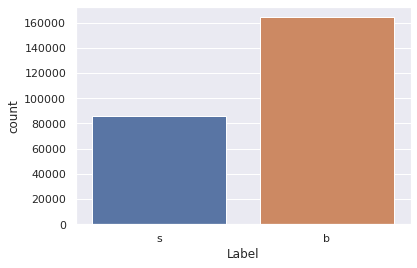

In [36]:
sns.set_theme(style="darkgrid")
#tips = sns.load_dataset("tips")
ax = sns.countplot(x="Label", data=train)

In [37]:
print("Train NA:")
print(train.isna().sum())
#sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Train NA:
EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0


In [38]:
print("Test NA:")
test = test.dropna() # varias columnas de test tienen 1 ocurrencia de un valor NA, debido al tamaño del dataset eliminarlas no ocasiona un fuerte impacto
print(test.isna().sum())

Test NA:
EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
P

In [39]:
test

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,899995,309.530,28.185,170.795,99.349,-999.000,-999.000,-999.000,3.061,2.367,...,1.956,177.103,1,97.451,-1.759,-0.733,-999.000,-999.000,-999.000,97.451
549996,899996,105.653,5.096,77.256,33.040,-999.000,-999.000,-999.000,2.693,33.040,...,-0.172,130.730,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549997,899997,-999.000,69.470,51.766,1.189,-999.000,-999.000,-999.000,1.615,1.189,...,0.336,71.646,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
549998,899998,107.254,13.500,79.833,50.801,-999.000,-999.000,-999.000,2.026,7.993,...,-0.988,243.371,1,43.099,-0.352,-2.594,-999.000,-999.000,-999.000,43.099


In [40]:
le = preprocessing.LabelEncoder()
train['Label'] = le.fit_transform(train['Label']) # procesamiento de columna label categorica (object) a una numerica

In [41]:
train = train.drop(['Weight'], axis=1,inplace=False) # eliminamos la columna weight porque test.csv no cuenta con el atributo
train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,0


In [42]:
X = train.loc[:,train.columns != 'Label']
Y = train.loc[:,'Label']

In [43]:
X

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [44]:
Y

0         1
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    1
249998    0
249999    0
Name: Label, Length: 250000, dtype: int64

# Clasificadores

## Naive Bayes

In [45]:
# Split the training data into training and validation 
trainX, valX, trainY, valY = model_selection.train_test_split(X, Y, test_size=0.2)

In [46]:
print("Naive Bayes")
# Modelo Naive Bayes
nBayes = GaussianNB()
nBayes = nBayes.fit(trainX, trainY)
accuracy = nBayes.score(valX, valY)
print("Accuracy:", accuracy)
results = nBayes.predict(test.head(20))

y_pred_prob = nBayes.predict_proba(valX)
false_positive_rate, true_positive_rate, threshold = roc_curve(valY, y_pred_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(results)

Naive Bayes
Accuracy: 0.66634
[0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]


## Arbol de Decision

In [47]:
# Split the training data into training and validation 
#trainX, valX, trainY, valY_DT = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

In [48]:
print("Arbol de Decision")
# Modelo de arbol de Decision
decTree = DecisionTreeClassifier()
decTree = decTree.fit(trainX, trainY)
accuracy = decTree.score(valX, valY)
print ("Accuracy:", accuracy)
results = decTree.predict(test.head(20))

y_pred_prob_DT = decTree.predict_proba(valX)
false_positive_rate_DT, true_positive_rate_DT, threshold_DT = roc_curve(valY, y_pred_prob_DT[:, 1])
roc_auc_DT = auc(false_positive_rate_DT, true_positive_rate_DT)

print(results)

Arbol de Decision
Accuracy: 0.76444
[0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0]


## Deep Learning

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # normalizacion de la data
trainX_scaled = scaler.fit_transform(trainX)
test_scaled = scaler.transform(test)

In [50]:
trainX_scaled

array([[ 0.47300935,  0.9835767 ,  0.9355243 , ...,  1.56160422,
         1.56432887,  1.77399699],
       [ 0.01972287,  0.48807448,  1.10473174, ..., -0.63945659,
        -0.63945696, -0.74455817],
       [-1.35119063,  0.81654966, -1.02168045, ..., -0.63945659,
        -0.63945696, -0.30486367],
       ...,
       [-1.11334787,  0.40349738, -0.62699497, ...,  1.56046177,
         1.56979406,  0.74923911],
       [ 1.432761  ,  0.38251128, -0.42000059, ...,  1.5640832 ,
         1.56403113,  0.15348354],
       [-0.7409307 ,  0.45630975, -0.44424979, ..., -0.63945659,
        -0.63945696, -0.74455817]])

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(trainX.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [52]:
print("Comenzando entrenamiento...")
historial = model.fit(trainX_scaled, trainY, epochs=100, verbose=True)
print("Modelo entrenado!")

Comenzando entrenamiento...
Epoch 1/100
6250/6250 [==============================] - 24s 4ms/step - loss: 0.4139 - accuracy: 0.8114 - precision: 0.7629 - recall: 0.6519
Epoch 2/100
6250/6250 [==============================] - 23s 4ms/step - loss: 0.3932 - accuracy: 0.8235 - precision: 0.7839 - recall: 0.6693
Epoch 3/100
6250/6250 [==============================] - 23s 4ms/step - loss: 0.3896 - accuracy: 0.8258 - precision: 0.7807 - recall: 0.6836
Epoch 4/100
6250/6250 [==============================] - 22s 4ms/step - loss: 0.3871 - accuracy: 0.8268 - precision: 0.7910 - recall: 0.6719
Epoch 5/100
6250/6250 [==============================] - 23s 4ms/step - loss: 0.3833 - accuracy: 0.8290 - precision: 0.7814 - recall: 0.6952
Epoch 6/100
6250/6250 [==============================] - 23s 4ms/step - loss: 0.3818 - accuracy: 0.8289 - precision: 0.7796 - recall: 0.6979
Epoch 7/100
6250/6250 [==============================] - 22s 4ms/step - loss: 0.3808 - accuracy: 0.8295 - precision: 0.7894 - 

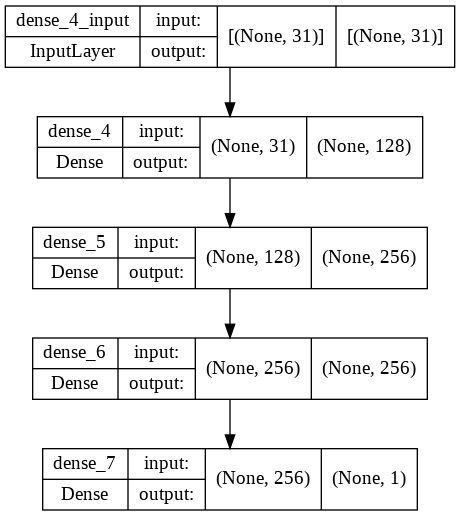

In [53]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

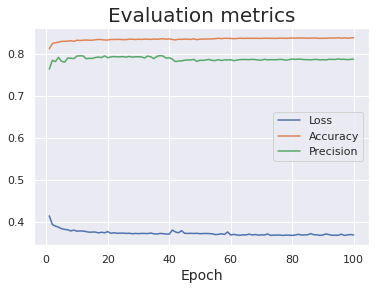

In [54]:
plt.plot(
    np.arange(1, 101), 
    historial.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    historial.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    historial.history['precision'], label='Precision'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [55]:
res = model.predict(test_scaled[0:20])
print(res.flatten())
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(res)
]
print(prediction_classes)

[0.03174889 0.03821042 0.6121054  0.8707061  0.03174889 0.09095803
 0.03174889 0.03174889 0.03174889 0.7540027  0.03174889 0.16005206
 0.56429654 0.03174889 0.03174889 0.03174889 0.17577532 0.03174889
 0.07509732 0.7909689 ]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


## Graficos

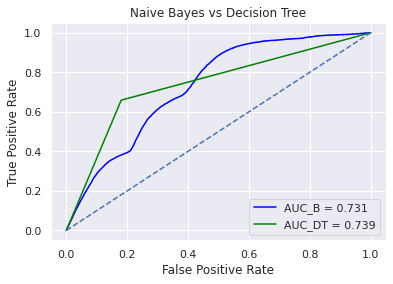

In [56]:
plt.title('Naive Bayes vs Decision Tree')

plt.plot(false_positive_rate,true_positive_rate, color='blue',label = 'AUC_B = %0.3f' % roc_auc)
plt.plot(false_positive_rate_DT,true_positive_rate_DT, color='green',label = 'AUC_DT = %0.3f' % roc_auc_DT)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

Text(16.000239999999955, 0.5, 'True')

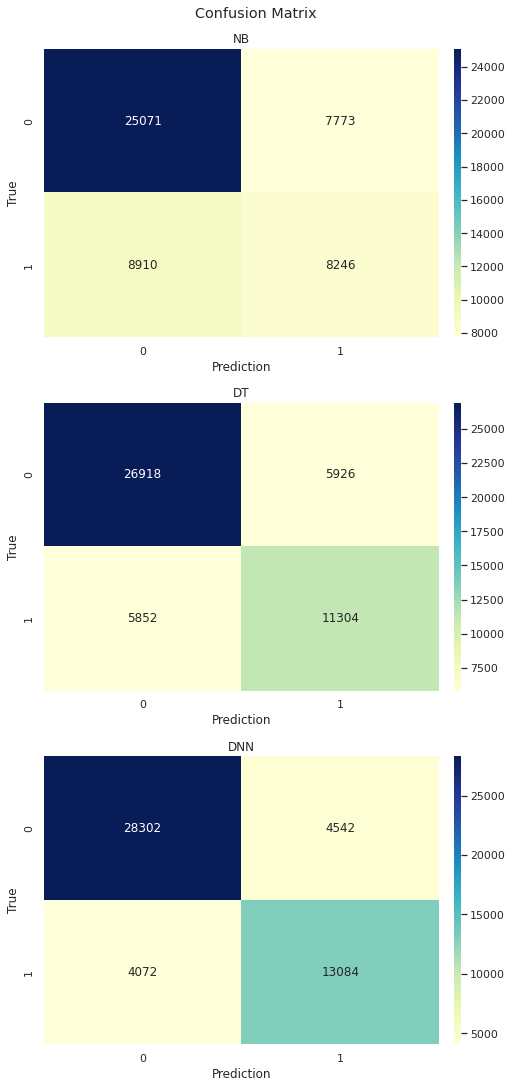

In [74]:
fig, axes = plt.subplots(3, 1, figsize=(7, 15), sharey=True, constrained_layout=True)
fig.suptitle('Confusion Matrix')

confusion_mtxNB = tf.math.confusion_matrix(valY, nBayes.predict(valX))
confusion_mtxDT = tf.math.confusion_matrix(valY, decTree.predict(valX))

valX_scaled = scaler.transform(valX)
pred = model.predict(valX_scaled)
prediction_class = [
    1 if prob > 0.5 else 0 for prob in np.ravel(pred)
]
confusion_mtxDNN = tf.math.confusion_matrix(valY, prediction_class)

#plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtxNB,
            ax=axes[0],
            #title="NB Confusion Matrix",
            xticklabels=["0", "1"],
            yticklabels=["0", "1"],
            annot=True, fmt='g',
            cmap="YlGnBu")
axes[0].set_title("NB")
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('True')

sns.heatmap(confusion_mtxDT,
            ax=axes[1],
            #title="DecTree Confusion Matrix",
            xticklabels=["0", "1"],
            yticklabels=["0", "1"],
            annot=True, fmt='g',
            cmap="YlGnBu")
axes[1].set_title("DT")
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('True')

sns.heatmap(confusion_mtxDNN,
            ax=axes[2],
            #title="DecTree Confusion Matrix",
            xticklabels=["0", "1"],
            yticklabels=["0", "1"],
            annot=True, fmt='g',
            cmap="YlGnBu")
axes[2].set_title("DNN")
axes[2].set_xlabel('Prediction')
axes[2].set_ylabel('True')